In [1]:
import pandas as pd

df = pd.read_csv(r'C:\Users\bless\PycharmProjects\practicum\Practicum_5\1976-2018-senate.tab', delimiter='\t')

In [2]:
df.head()

,year,state,state_po,state_fips,state_cen,state_ic,office,district,stage,special,candidate,party,writein,mode,candidatevotes,totalvotes,unofficial,version
0,1976,Arizona,AZ,4,86,61,US Senate,statewide,gen,False,Sam Steiger,republican,False,total,321236,741210,False,20171011.0
1,1976,Arizona,AZ,4,86,61,US Senate,statewide,gen,False,Wm. Mathews Feighan,independent,False,total,1565,741210,False,20171011.0
2,1976,Arizona,AZ,4,86,61,US Senate,statewide,gen,False,Dennis DeConcini,democrat,False,total,400334,741210,False,20171011.0
3,1976,Arizona,AZ,4,86,61,US Senate,statewide,gen,False,Allan Norwitz,libertarian,False,total,7310,741210,False,20171011.0
4,1976,Arizona,AZ,4,86,61,US Senate,statewide,gen,False,Bob Field,independent,False,total,10765,741210,False,20171011.0


In [3]:
df['percentage_votes'] = 100 * (df['candidatevotes']/df['totalvotes'])

In [4]:
df.shape


(3421, 19)

In [5]:
df.isnull().sum()

year                  0
state                 0
state_po              0
state_fips            0
state_cen             0
state_ic              0
office                0
district              0
stage                 0
special               0
candidate           410
party               563
writein               0
mode                  0
candidatevotes        0
totalvotes            0
unofficial            0
version               1
percentage_votes      0
dtype: int64

In [6]:
df.dropna()

,year,state,state_po,state_fips,state_cen,state_ic,office,district,stage,special,candidate,party,writein,mode,candidatevotes,totalvotes,unofficial,version,percentage_votes
0,1976,Arizona,AZ,4,86,61,US Senate,statewide,gen,False,Sam Steiger,republican,False,total,321236,741210,False,20171011.0,43.339404
1,1976,Arizona,AZ,4,86,61,US Senate,statewide,gen,False,Wm. Mathews Feighan,independent,False,total,1565,741210,False,20171011.0,0.211141
2,1976,Arizona,AZ,4,86,61,US Senate,statewide,gen,False,Dennis DeConcini,democrat,False,total,400334,741210,False,20171011.0,54.010874
3,1976,Arizona,AZ,4,86,61,US Senate,statewide,gen,False,Allan Norwitz,libertarian,False,total,7310,741210,False,20171011.0,0.986225
4,1976,Arizona,AZ,4,86,61,US Senate,statewide,gen,False,Bob Field,independent,False,total,10765,741210,False,20171011.0,1.452355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3414,2018,Wisconsin,WI,55,35,25,US Senate,statewide,gen,False,Tammy Baldwin,democrat,False,total,1472914,2657841,False,20190110.0,55.417687
3415,2018,Wisconsin,WI,55,35,25,US Senate,statewide,gen,False,Leah Vukmir,republican,False,total,1184885,2657841,False,20190110.0,44.580733
3417,2018,Wyoming,WY,56,83,68,US Senate,statewide,gen,False,John Barrasso,republican,False,total,136210,203420,False,20190110.0,66.959984
3418,2018,Wyoming,WY,56,83,68,US Senate,statewide,gen,False,Gary Trauner,democrat,False,total,61227,203420,False,20190110.0,30.098810


In [7]:
df_r = df[['year', 'state_po', 'percentage_votes', 'party']]

In [8]:
df_r.head()

,year,state_po,percentage_votes,party
0,1976,AZ,43.339404,republican
1,1976,AZ,0.211141,independent
2,1976,AZ,54.010874,democrat
3,1976,AZ,0.986225,libertarian
4,1976,AZ,1.452355,independent


In [9]:
df_r.set_index('year', inplace=True)

In [10]:
df_r['state_po'] = pd.get_dummies(df_r['state_po'])

<ipython-input-10-37515990a35f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_r['state_po'] = pd.get_dummies(df_r['state_po'])


In [11]:
df_r

,state_po,percentage_votes,party
year,,,
1976,0,43.339404,republican
1976,0,0.211141,independent
1976,0,54.010874,democrat
1976,0,0.986225,libertarian
1976,0,1.452355,independent
...,...,...,...
2018,0,0.001580,NaN
2018,0,66.959984,republican
2018,0,30.098810,democrat


In [12]:
# df_r['percentage_votes'] = pd.cut(df_r['percentage_votes'], 10)


In [13]:
df_r['percentage_votes'] = pd.get_dummies(df['percentage_votes'])

<ipython-input-13-99b2d52698d1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_r['percentage_votes'] = pd.get_dummies(df['percentage_votes'])


In [14]:
df_r

,state_po,percentage_votes,party
year,,,
1976,0,0,republican
1976,0,0,independent
1976,0,0,democrat
1976,0,0,libertarian
1976,0,0,independent
...,...,...,...
2018,0,0,NaN
2018,0,0,republican
2018,0,0,democrat


In [15]:
df_r.dropna(subset=['party'], how='any', inplace=True)

<ipython-input-15-d423b0e2a95e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_r.dropna(subset=['party'], how='any', inplace=True)


In [16]:
df_r.isnull().sum()

state_po            0
percentage_votes    0
party               0
dtype: int64

In [17]:
X = df_r[['state_po', 'percentage_votes']]
y = df_r['party']

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
gnb = GaussianNB()
model_gnb = gnb.fit(X_train, y_train)
y_pred = model_gnb.predict(X_test)

accuracy = model_gnb.score(X_test, y_test) * 100
print('Accuracy of model: {:.2f}%'.format(accuracy))

Accuracy of model: 2.10%


In [46]:



def get_predictions(X):
    prediction = model_gnb.predict(X_test)
    return prediction


AR = (df['state_po'] == 'AR')
PV = (df['percentage_votes'] == (0.6-0.7))
X1 = (AR, PV)
get_predictions(X1)

array(['socialist workers', 'socialist workers', 'socialist workers',
       'socialist workers', 'alaskan independence', 'socialist workers',
       'socialist workers', 'socialist workers', 'socialist workers',
       'socialist workers', 'socialist workers', 'socialist workers',
       'socialist workers', 'socialist workers', 'alaskan independence',
       'socialist workers', 'socialist workers', 'socialist workers',
       'socialist workers', 'socialist workers', 'socialist workers',
       'socialist workers', 'socialist workers', 'socialist workers',
       'socialist workers', 'socialist workers', 'socialist workers',
       'socialist workers', 'socialist workers', 'socialist workers',
       'socialist workers', 'socialist workers', 'socialist workers',
       'socialist workers', 'socialist workers', 'socialist workers',
       'socialist workers', 'socialist workers', 'socialist workers',
       'socialist workers', 'socialist workers', 'socialist workers',
       'social

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
lr = LogisticRegression(random_state=0)
lr_model = lr.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

In [22]:
accuracy = lr_model.score(X_test, y_test) * 100
print('Accuracy of Logistic Regression model: {:.2f}%'.format(accuracy))

Accuracy of Logistic Regression model: 26.05%


In [23]:
from sklearn.ensemble import RandomForestClassifier 
clf = RandomForestClassifier()
clf_model = clf.fit(X_train, y_train)
clf_predict = clf_model.predict(X_test)

accuracy = clf_model.score(X_test, y_test) * 100
print('Accuracy of Random Forest model: {:.2f}%'.format(accuracy))

Accuracy of Random Forest model: 26.05%


In [24]:
from sklearn.svm import LinearSVC
svm = LinearSVC()
svm_model = svm.fit(X_train, y_train)
svm_predict = svm_model.predict(X_test)

accuracy = svm_model.score(X_test, y_test) * 100
print('Accuracy of SVM model: {:.2f}%'.format(accuracy))

Accuracy of SVM model: 26.05%


In [31]:
from sklearn.neighbors import KNeighborsClassifier
k = 15

knn = KNeighborsClassifier(n_neighbors = k)

knn_model = knn.fit(X_train,y_train)
 
knn_predict = knn_model.predict(X_test)

accuracy = knn_model.score(X_test, y_test) * 100
from sklearn import metrics
print('Acccuracy score of KNN15: {:.2f}'.format(accuracy))



print("Train set Accuracy: ", metrics.accuracy_score(y_train, knn_model.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, knn_predict))

Acccuracy score of KNN15: 26.40
Train set Accuracy:  0.2646544181977253
Test set Accuracy:  0.263986013986014


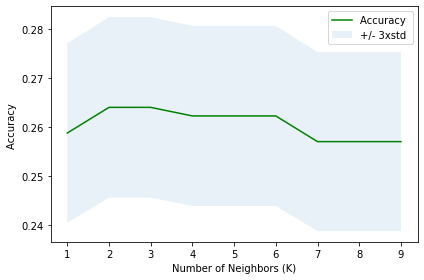

Best accuracy: 0.263986013986014 k= 2


In [35]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

ConfustionMx = [];
for n in range(1,Ks):
    
    
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()
print( "Best accuracy:", mean_acc.max(), "k=", mean_acc.argmax()+1)